In [1]:
import EddyDetectionV2 as eddy
import oceanspy as ospy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.colors import SymLogNorm
from tqdm import tqdm
import ast
from matplotlib.animation import FuncAnimation, FFMpegFileWriter
from matplotlib.colors import LinearSegmentedColormap

In [2]:
time = ['2018-06-01T00:00:00.000000000','2018-06-30T00:00:00.000000000']
####################################################################


# Import data #######################################################################################################################
depth = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/Depth_res.nc')['Depth'].sel(Y=slice(70,75)).sel(X=slice(-22,2))
depth_no_nan = depth
depth = depth.where(depth > 0, np.nan)

df = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/Background_var_eddies.nc')
df2 = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/OceanSpyStructureDimsAndVar.nc')
df3 = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/Background_var.nc')
df['dxC'] = df2['dxC']
df['dxG'] = df2['dxG']
df['dyC'] = df2['dyC']
df['dyG'] = df2['dyG']
df['HFacC'] = df2['HFacC']
df['rA'] = df2['rA']
df['HFacW'] = df2['HFacW']
df['rAz'] = df2['rAz']
df['fCoriG'] = df2['fCoriG']
df['HFacS'] = df2['HFacS']
df['S'] = df3['S'].sel(Z=-1)
df['Temp'] = df3['Temp'].sel(Z=-1)

df_OW = df['Okubo_Weiss']
df_OW = df_OW*(1/(10**(-9)))
df_eta = df['Eta']
U = df['U']
V = df['V']
X = df['X']
Y = df['Y']

od = ospy.OceanDataset(df)
od = od.compute.horizontal_velocity_magnitude()
od = od.compute.eddy_kinetic_energy()
od = od.compute.missing_horizontal_spacing()
od = od.compute.normal_strain()
od = od.compute.shear_strain()
od = od.compute.vertical_relative_vorticity()
# od = od.compute.relative_vorticity()
# od = od.compute.Ertel_potential_vorticity()

df_hor_vel = od['hor_vel']
df_EKE = od['EKE']
df_nS = od['n_strain']
df_sS = od['s_strain']
df_rV = od['momVort3']
# Delete no longer used variables which uses memory
# del od, df
#####################################################################################################################################
# Child domain
domain_center = [[-20,0],[71,74]]
OW_center = df_OW.sel(X=slice(domain_center[0][0],domain_center[0][1])).sel(Y=slice(domain_center[1][0],domain_center[1][1])).sel(Z=-1)
eta_center = df_eta.sel(X=slice(domain_center[0][0],domain_center[0][1])).sel(Y=slice(domain_center[1][0],domain_center[1][1]))

# Parent domain
eta = df_eta.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Y=slice(domain_center[1][0]-1,domain_center[1][1]+1))
OW = df_OW.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Y=slice(domain_center[1][0]-1,domain_center[1][1]+1)).sel(Z=-1)


# Define time extent
eta = eta.sel(time=slice(time[0],time[1]))
eta_center = eta_center.sel(time=slice(time[0],time[1]))
OW = OW.sel(time=slice(time[0],time[1]))
OW_center = OW_center.sel(time=slice(time[0],time[1]))
hor_vel = df_hor_vel.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Y=slice(domain_center[1][0]-2,domain_center[1][1]+2)).sel(Z=-1).sel(time=slice(time[0],time[1]))

U = U.sel(Xp1=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Y=slice(domain_center[1][0]-2,domain_center[1][1]+2)).sel(Z=-1).sel(time=slice(time[0],time[1]))
V = V.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Yp1=slice(domain_center[1][0]-2,domain_center[1][1]+2)).sel(Z=-1).sel(time=slice(time[0],time[1]))

X = X.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2))
Y = Y.sel(Y=slice(domain_center[1][0]-2,domain_center[1][1]+2))

eta = eta.where(depth > 0, np.nan)
OW = OW.where(depth > 0, np.nan)


Computing magnitude of horizontal velocity


/nird/home/ekv036/MSc_env/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Computing weighted_mean.
Computing weighted_mean.


/nird/home/ekv036/MSc_env/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Computing kinetic energy using the following parameters: {'eps_nh': 0}.


/nird/home/ekv036/MSc_env/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Computing missing horizontal spacing.
Computing normal component of strain.
Computing divergence.


/nird/home/ekv036/MSc_env/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/nird/home/ekv036/MSc_env/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Computing shear component of strain.


/nird/home/ekv036/MSc_env/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/nird/home/ekv036/MSc_env/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Computing vertical component of relative vorticity.
Computing curl.


/nird/home/ekv036/MSc_env/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/nird/home/ekv036/MSc_env/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [3]:
display(df3)

<xarray.Dataset> Size: 40GB
Dimensions:    (Z: 216, Zp1: 217, Zu: 216, Zl: 216, X: 765, Y: 628, Xp1: 766,
                Yp1: 629, time: 12, time_midp: 11)
Coordinates: (12/18)
  * Z          (Z) float64 2kB -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
  * Zp1        (Zp1) float64 2kB 0.0 -2.0 -5.0 ... -3.932e+03 -3.951e+03
  * Zu         (Zu) float64 2kB -2.0 -5.0 -9.0 ... -3.932e+03 -3.951e+03
  * Zl         (Zl) float64 2kB 0.0 -2.0 -5.0 ... -3.913e+03 -3.932e+03
  * X          (X) float64 6kB -29.92 -29.84 -29.76 -29.67 ... 11.72 11.82 11.92
  * Y          (Y) float64 5kB 65.01 65.03 65.04 65.06 ... 78.75 78.83 78.92
    ...         ...
  * time       (time) datetime64[ns] 96B 2017-09-01 2017-10-01 ... 2018-08-01
    YU         (Y, Xp1) float64 4MB ...
    XU         (Y, Xp1) float64 4MB ...
    YV         (Yp1, X) float64 4MB ...
    XV         (Yp1, X) float64 4MB ...
  * time_midp  (time_midp) datetime64[ns] 88B 2017-09-16 ... 2018-07-16T12:00:00
Data variables:
    U          (time, Z, Y, Xp1) float64 10GB ...
    V          (time, Z, Yp1, X) float64 10GB ...
    Temp       (time, Z, Y, X) float64 10GB ...
    S          (time, Z, Y, X) float64 10GB ...
    Eta        (time, Y, X) float64 46MB ...
    MXLDEPTH   (time, Y, X) float64 46MB ...
    SIarea     (time, Y, X) float64 46MB ...
    SIheff     (time, Y, X) float64 46MB ...
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None, ...
    OceanSpy_grid_periodic:  []

In [4]:
# Interpolating U to the target grid (X, Y)
U_interp = U.interp(Xp1=X, Y=Y, method='linear')

# Interpolating V to the target grid (X, Y)
V_interp = V.interp(X=X, Yp1=Y, method='linear')

# Drop the existing Y coordinate in V_interp to avoid conflicts
U_interp = U_interp.drop_vars('X')
V_interp = V_interp.drop_vars('Y')


# Rename the dimensions and coordinates
U_interp = U_interp.rename({'Xp1': 'X'})
V_interp = V_interp.rename({'Yp1': 'Y'})


# Ensure the coordinates are updated correctly
U_interp_r = U_interp.assign_coords(X=X, Y=Y)
V_interp_r = V_interp.assign_coords(X=X, Y=Y)

/tmp/ipykernel_3778120/1989897581.py:13: UserWarning: rename 'Xp1' to 'X' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  U_interp = U_interp.rename({'Xp1': 'X'})
/tmp/ipykernel_3778120/1989897581.py:14: UserWarning: rename 'Yp1' to 'Y' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  V_interp = V_interp.rename({'Yp1': 'Y'})


In [5]:
# Resample data
time = ['2018-06-01T00:00:00.000000000','2018-06-30T00:00:00.000000000']
eta = eta.resample(time='D').mean(dim='time')
eta_center = eta_center.resample(time='D').mean(dim='time')
OW = OW.resample(time='D').mean(dim='time')
OW_center = OW_center.resample(time='D').mean(dim='time')
hor_vel = df_hor_vel.resample(time='D').mean(dim='time')

hor_vel = hor_vel.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Y=slice(domain_center[1][0]-2,domain_center[1][1]+2)).sel(Z=-1).sel(time=slice(time[0],time[1]))

FWC = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/FWC_full_domain.nc')['__xarray_dataarray_variable__'].sel(Y=slice(70,75)).sel(X=slice(-22,2)).sel(time=slice(time[0],time[1]))
FWC = FWC.resample(time='D').mean(dim='time')
EKE = df_EKE.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Y=slice(domain_center[1][0]-2,domain_center[1][1]+2)).sel(Z=-1).sel(time=slice(time[0],time[1]))
df_nS = df_nS.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Y=slice(domain_center[1][0]-2,domain_center[1][1]+2)).sel(Z=-1).sel(time=slice(time[0],time[1]))
df_sS = df_sS.sel(Xp1=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Yp1=slice(domain_center[1][0]-2,domain_center[1][1]+2)).sel(Z=-1).sel(time=slice(time[0],time[1]))
df_rV = df_rV.sel(Xp1=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Yp1=slice(domain_center[1][0]-2,domain_center[1][1]+2)).sel(Z=-1).sel(time=slice(time[0],time[1]))

eta = eta.where(depth > 0, np.nan)
OW = OW.where(depth > 0, np.nan)

In [6]:
with open("eddyCenterpoints_fullYear.txt",'r') as f:
        data = f.read()
        eddyLocation = ast.literal_eval(data)


# Dates to find
dates_to_find = time

# Convert dates to numpy datetime64
dates_to_find = np.array(dates_to_find, dtype='datetime64[ns]')

# Find the index positions
indices = [df_eta.time.where(df_eta.time == date, drop=True).time.values[0] for date in dates_to_find]

# Convert the datetime64 values to integer indices
index_positions = [np.where(df_eta.time.values == date)[0][0] for date in dates_to_find]

print(index_positions)

eddyLocation = eddyLocation[index_positions[0]:index_positions[1]+1]

[273, 302]


In [7]:
eddies = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/Eddies_fullYear.nc')
eddies = eddies['EddyDetection'].sel(time=slice(time[0],time[1]))
# eddies = eddies.fillna(0)
# display(eddies.max().values)
# EKE_std = EKE.std()
# cond = (eddies == 0) & (EKE >= EKE_std)
# eddies = eddies.where(~cond,other=4)
eddies_EKE = eddies[10]

In [8]:
display(eddies.max().values)

array(4.)

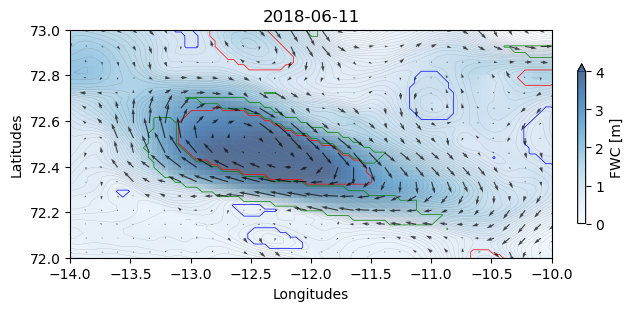

In [9]:
fig, ax = plt.subplots(figsize=(6.2217,3),layout='constrained')

eddies = eddies.where(eddies !=0,other=np.nan)
eddies = eddies.fillna(0)

# Define the custom colormap
colors = ['red', 'blue', 'green']
cmap = mcolors.ListedColormap(colors)

# Define the normalization
bounds = [0.5, 1.5, 2.5, 4.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

time_ = 10
mesh = ax.pcolormesh(FWC.X,FWC.Y,FWC[time_],cmap='Blues',vmin=0,vmax=4,alpha=0.7,zorder=0)
cbar = fig.colorbar(mesh, pad=0.01, shrink=0.7, extend='max')
cbar.set_label('FWC [m]')
ax.contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==1,other=0),[0.5],colors='red',zorder=2,linewidths=0.5)
ax.contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==2,other=0),[1.5],colors='blue',zorder=2,linewidths=0.5)
ax.contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==4,other=0),[3.5],colors='green',zorder=2,linewidths=0.5)
ax.contour(eta.X,eta.Y,eta[time_],levels=np.arange(eta.min(),eta.max(),0.003),colors='grey',linewidths=0.15,zorder=1)

subsample_factor = 3

q_X, q_Y = np.meshgrid(hor_vel.X,hor_vel.Y) 
quiver = ax.quiver(q_X[::subsample_factor, ::subsample_factor], q_Y[::subsample_factor, ::subsample_factor],
        U_interp.values[time_][::subsample_factor, ::subsample_factor],
        V_interp.values[time_][::subsample_factor, ::subsample_factor],
        color='black', scale=5, scale_units='xy', alpha=0.7, zorder=2)

ax.set_xlim(-14,-10)
ax.set_ylim(72,73)

ax.set_title(str(eddies[time_].time.values)[0:10])
ax.set_xlabel('Longitudes')
ax.set_ylabel('Latitudes')

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyEKEOuterAreaEX',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

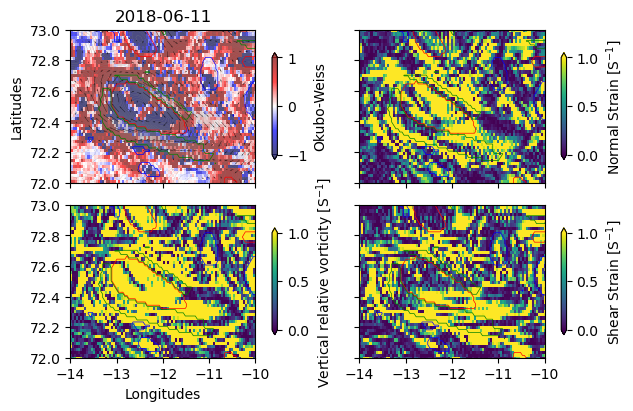

In [10]:
import matplotlib.ticker as ticker
fig, ax = plt.subplot_mosaic([[0,1],[2,3]], sharey=True,sharex=True,
    figsize=(6.2217,4),layout='constrained')

eddies = eddies.where(eddies !=0,other=np.nan)
eddies = eddies.fillna(0)

# Define the custom colormap
colors = ['red', 'blue', 'green']
cmap = mcolors.ListedColormap(colors)

# Define the normalization
bounds = [0.5, 1.5, 2.5, 4.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

time_ = 10
mesh = ax[0].pcolormesh(OW.X,OW.Y,OW[time_],cmap='seismic',vmin=-1,vmax=1,alpha=0.7,zorder=0)
cbar = fig.colorbar(mesh, pad=0.01, shrink=0.7, extend='both')
cbar.set_label('Okubo-Weiss')


ax[0].contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==1,other=0),[0.5],colors='red',zorder=2,linewidths=0.5)
ax[0].contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==2,other=0),[1.5],colors='blue',zorder=2,linewidths=0.5)
ax[0].contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==4,other=0),[3.5],colors='green',zorder=2,linewidths=0.5)
ax[0].contour(eta.X,eta.Y,eta[time_],levels=np.arange(eta.min(),eta.max(),0.003),colors='grey',linewidths=0.15,zorder=1)

subsample_factor = 3

q_X, q_Y = np.meshgrid(hor_vel.X,hor_vel.Y) 
quiver = ax[0].quiver(q_X[::subsample_factor, ::subsample_factor], q_Y[::subsample_factor, ::subsample_factor],
        U_interp.values[time_][::subsample_factor, ::subsample_factor],
        V_interp.values[time_][::subsample_factor, ::subsample_factor],
        color='black', scale=5, scale_units='xy', alpha=0.7, zorder=1)

ax[0].set_xlim(-14,-10)
ax[0].set_ylim(72,73)

ax[0].set_title(str(eddies[time_].time.values)[0:10])
ax[2].set_xlabel('Longitudes')
ax[0].set_ylabel('Latitudes')


ax[1].contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==1,other=0),[0.5],colors='red',zorder=2,linewidths=0.5)
ax[1].contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==2,other=0),[1.5],colors='blue',zorder=2,linewidths=0.5)
ax[1].contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==4,other=0),[3.5],colors='green',zorder=2,linewidths=0.5)
ax[1].contour(eta.X,eta.Y,eta[time_],levels=np.arange(eta.min(),eta.max(),0.003),colors='grey',linewidths=0.15,zorder=1)

mesh = ax[1].pcolormesh(df_nS.X,df_nS.Y,df_nS[time_]**2*(1/(10**(-9))),vmin=0,vmax=1)
cbar = fig.colorbar(mesh, pad=0.01, shrink=0.7,extend='both')
cbar.set_label('Normal Strain [S$^{-1}$]')



ax[3].contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==1,other=0),[0.5],colors='red',zorder=2,linewidths=0.5)
ax[3].contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==2,other=0),[1.5],colors='blue',zorder=2,linewidths=0.5)
ax[3].contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==4,other=0),[3.5],colors='green',zorder=2,linewidths=0.5)
ax[3].contour(eta.X,eta.Y,eta[time_],levels=np.arange(eta.min(),eta.max(),0.003),colors='grey',linewidths=0.15,zorder=1)

mesh = ax[3].pcolormesh(df_sS.Xp1,df_sS.Yp1,df_sS[time_]**2*(1/(10**(-9))),vmin=0,vmax=1)
cbar = fig.colorbar(mesh, pad=0.01, shrink=0.7,extend='both')
cbar.set_label('Shear Strain [S$^{-1}$]')


ax[2].contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==1,other=0),[0.5],colors='red',zorder=2,linewidths=0.5)
ax[2].contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==2,other=0),[1.5],colors='blue',zorder=2,linewidths=0.5)
ax[2].contour(eddies.X,eddies.Y,eddies[time_].where(eddies[time_]==4,other=0),[3.5],colors='green',zorder=2,linewidths=0.5)
ax[2].contour(eta.X,eta.Y,eta[time_],levels=np.arange(eta.min(),eta.max(),0.003),colors='grey',linewidths=0.15,zorder=1)

mesh = ax[2].pcolormesh(df_rV.Xp1,df_rV.Yp1,df_rV[time_]**2*(1/(10**(-9))),vmin=0,vmax=1)
cbar = fig.colorbar(mesh, pad=0.01, shrink=0.7,extend='both')
cbar.set_label('Vertical relative vorticity [S$^{-1}$]')


fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyOWEX',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

In [11]:
df_rV[time_]

<xarray.DataArray 'momVort3' (Yp1: 321, Xp1: 509)> Size: 1MB
array([[-4.08383911e-05, -7.50615558e-05, -5.71130592e-05, ...,
         6.20257274e-06,  1.92931013e-06,  7.15734401e-06],
       [ 4.72407361e-05,  1.38731988e-05,  1.30082217e-05, ...,
         2.78438410e-06,  9.04230702e-06,  4.40525669e-06],
       [ 3.19626387e-05,  8.14044832e-06,  3.19415346e-05, ...,
         2.91655665e-06,  6.75457928e-06,  8.51598389e-06],
       ...,
       [            nan,             nan,             nan, ...,
        -1.91281791e-05, -2.28327669e-05, -2.89754274e-05],
       [            nan,             nan,             nan, ...,
        -1.25875914e-05, -1.23556025e-06,  6.22739820e-06],
       [            nan,             nan,             nan, ...,
         1.15146819e-05, -1.99816470e-06, -1.65707365e-05]])
Coordinates:
    Z        float64 8B -1.0
  * Xp1      (Xp1) float64 4kB -21.96 -21.9 -21.85 -21.79 ... 1.849 1.909 1.964
  * Yp1      (Yp1) float64 3kB 69.01 69.03 69.04 69.06 ... 75.89 75.93 75.97
    time     datetime64[ns] 8B 2018-06-11
    XG       (Yp1, Xp1) float64 1MB ...
    YG       (Yp1, Xp1) float64 1MB ...
Attributes:
    units:      s^-1
    long_name:  vertical component of relative vorticity

# Comparing all tried methods

In [19]:
eddies_zero = xr.zeros_like(eta[0]).rename('Eddies')
eddies_vel_from_int = eddy.Full_eddy_region_v1(eddyCenterpoints=eddyLocation[time_][0],eta=eta[time_],hor_vel=hor_vel[time_],warm=True,eddiesData=eddies_zero,min_vel_diff=0.05,percentage_diff_vel=70)
eddies_vel_from_int = eddy.Full_eddy_region_v1(eddyCenterpoints=eddyLocation[time_][1],eta=eta[time_],hor_vel=hor_vel[time_],cold=True,eddiesData=eddies_vel_from_int,min_vel_diff=0.05,percentage_diff_vel=70)
eddies_EKE = eddies[time_]
eddies_zero = xr.zeros_like(eta[0]).rename('Eddies')
eddies_SSH_outermost_enclosed = eddy.Full_eddy_region_v2(eddyCenterpoints=eddyLocation[time_][0],eta=eta[time_],warm=True,eddiesData=eddies_zero)
eddies_SSH_outermost_enclosed = eddy.Full_eddy_region_v2(eddyCenterpoints=eddyLocation[time_][1],eta=eta[time_],cold=True,eddiesData=eddies_SSH_outermost_enclosed)

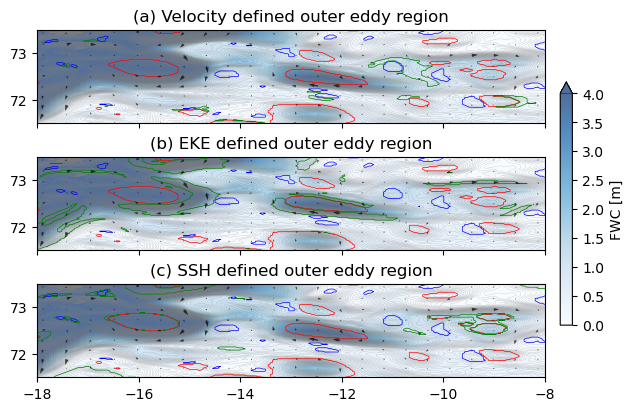

In [20]:
fig, ax = plt.subplot_mosaic([[0],[1],[2]],sharex=True,sharey=True,
                             figsize=(6.2217,4),layout='constrained')


mesh = ax[0].pcolormesh(FWC.X,FWC.Y,FWC[time_],cmap='Blues',vmin=0,vmax=4,alpha=0.7,zorder=0)
cbar = fig.colorbar(mesh,ax=[ax[0],ax[1],ax[2]], pad=0.01, shrink=0.7, extend='max')
cbar.set_label('FWC [m]')
ax[0].contour(eddies_vel_from_int.X,eddies_vel_from_int.Y,eddies_vel_from_int.where(eddies_vel_from_int==1,other=0),[0.5],colors='red',zorder=2,linewidths=0.5)
ax[0].contour(eddies.X,eddies.Y,eddies_vel_from_int.where(eddies_vel_from_int==2,other=0),[1.5],colors='blue',zorder=2,linewidths=0.5)
ax[0].contour(eddies.X,eddies.Y,eddies_vel_from_int.where(eddies_vel_from_int==4,other=0),[3.5],colors='green',zorder=2,linewidths=0.5)
ax[0].contour(eta.X,eta.Y,eta[time_],levels=np.arange(eta.min(),eta.max(),0.003),colors='grey',linewidths=0.15,zorder=1)

subsample_factor = 10

q_X, q_Y = np.meshgrid(hor_vel.X,hor_vel.Y) 
quiver = ax[0].quiver(q_X[::subsample_factor, ::subsample_factor], q_Y[::subsample_factor, ::subsample_factor],
        U_interp.values[time_][::subsample_factor, ::subsample_factor],
        V_interp.values[time_][::subsample_factor, ::subsample_factor],
        color='black', scale=5, scale_units='xy', alpha=0.7, zorder=2)

ax[0].set_xlim(-18,-8)
ax[0].set_ylim(71.5,73.5)
ax[0].set_title('(a) Velocity defined outer eddy region')

ax[1].pcolormesh(FWC.X,FWC.Y,FWC[time_],cmap='Blues',vmin=0,vmax=4,alpha=0.7,zorder=0)
ax[1].contour(eddies.X,eddies.Y,eddies_EKE.where(eddies_EKE==1,other=0),[0.5],colors='red',zorder=2,linewidths=0.5)
ax[1].contour(eddies.X,eddies.Y,eddies_EKE.where(eddies_EKE==2,other=0),[1.5],colors='blue',zorder=2,linewidths=0.5)
ax[1].contour(eddies.X,eddies.Y,eddies_EKE.where(eddies_EKE==4,other=0),[3.5],colors='green',zorder=2,linewidths=0.5)
ax[1].contour(eta.X,eta.Y,eta[time_],levels=np.arange(eta.min(),eta.max(),0.003),colors='grey',linewidths=0.15,zorder=1)

subsample_factor = 10

q_X, q_Y = np.meshgrid(hor_vel.X,hor_vel.Y) 
quiver = ax[1].quiver(q_X[::subsample_factor, ::subsample_factor], q_Y[::subsample_factor, ::subsample_factor],
        U_interp.values[time_][::subsample_factor, ::subsample_factor],
        V_interp.values[time_][::subsample_factor, ::subsample_factor],
        color='black', scale=5, scale_units='xy', alpha=0.7, zorder=2)

ax[1].set_title('(b) EKE defined outer eddy region')

ax[2].pcolormesh(FWC.X,FWC.Y,FWC[time_],cmap='Blues',vmin=0,vmax=4,alpha=0.7,zorder=0)
ax[2].contour(eddies.X,eddies.Y,eddies_SSH_outermost_enclosed.where(eddies_SSH_outermost_enclosed==1,other=0),[0.5],colors='red',zorder=2,linewidths=0.5)
ax[2].contour(eddies.X,eddies.Y,eddies_SSH_outermost_enclosed.where(eddies_SSH_outermost_enclosed==2,other=0),[1.5],colors='blue',zorder=2,linewidths=0.5)
ax[2].contour(eddies.X,eddies.Y,eddies_SSH_outermost_enclosed.where(eddies_SSH_outermost_enclosed==4,other=0),[3.5],colors='green',zorder=2,linewidths=0.5)
ax[2].contour(eta.X,eta.Y,eta[time_],levels=np.arange(eta.min(),eta.max(),0.003),colors='grey',linewidths=0.15,zorder=1)

subsample_factor = 10

q_X, q_Y = np.meshgrid(hor_vel.X,hor_vel.Y) 
quiver = ax[2].quiver(q_X[::subsample_factor, ::subsample_factor], q_Y[::subsample_factor, ::subsample_factor],
        U_interp.values[time_][::subsample_factor, ::subsample_factor],
        V_interp.values[time_][::subsample_factor, ::subsample_factor],
        color='black', scale=5, scale_units='xy', alpha=0.7, zorder=2)

ax[2].set_title('(c) SSH defined outer eddy region')

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyOuterRegionMethodsEX',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

In [14]:
display(eddies_vel_from_int)

<xarray.DataArray 'Eddies' (Y: 231, X: 510)> Size: 942kB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 -21.82 ... 1.879 1.936 1.994
  * Y        (Y) float64 2kB 70.01 70.03 70.04 70.06 ... 74.89 74.92 74.95 74.99
    XC       (Y, X) float64 942kB -21.98 -21.93 -21.87 ... 1.879 1.936 1.994
    YC       (Y, X) float64 942kB 70.01 70.01 70.01 70.01 ... 74.99 74.99 74.99
    time     datetime64[ns] 8B 2018-06-01
Attributes:
    long_name:      free-surface_r-anomaly
    units:          m
    standard_name:  sea_surface_height_above_geoid
    _coordinates:   XC YC iter

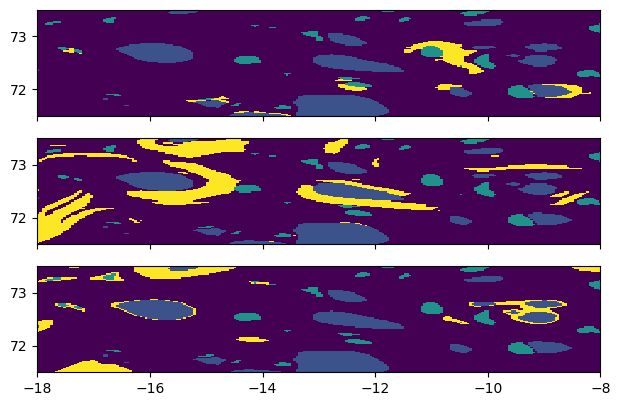

In [15]:
fig, (ax,ax2,ax3) = plt.subplots(3,1, figsize=(6.2217,4), layout='constrained', sharex=True, sharey=True)
ax.set_xlim(-18,-8)
ax.set_ylim(71.5,73.5)
ax.pcolormesh(eddies_vel_from_int.X,eddies_vel_from_int.Y,eddies_vel_from_int,zorder=0)
ax2.pcolormesh(eddies_EKE.X,eddies_EKE.Y,eddies_EKE,zorder=0)
ax3.pcolormesh(eddies_SSH_outermost_enclosed.X,eddies_SSH_outermost_enclosed.Y,eddies_SSH_outermost_enclosed,zorder=0)
 

# Eddy Theory part figures

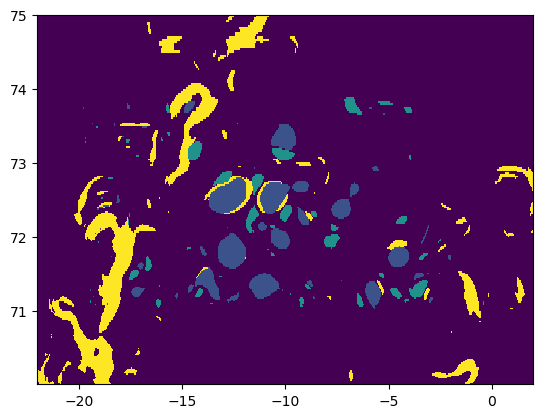

In [16]:
plt.pcolormesh(eddies.X,eddies.Y,eddies[0])

In [17]:
fig, ax = plt.subplots(
    figsize=(6.2217,3), layout='constrained'
)

ax.

SyntaxError: invalid syntax (2950191836.py, line 5)